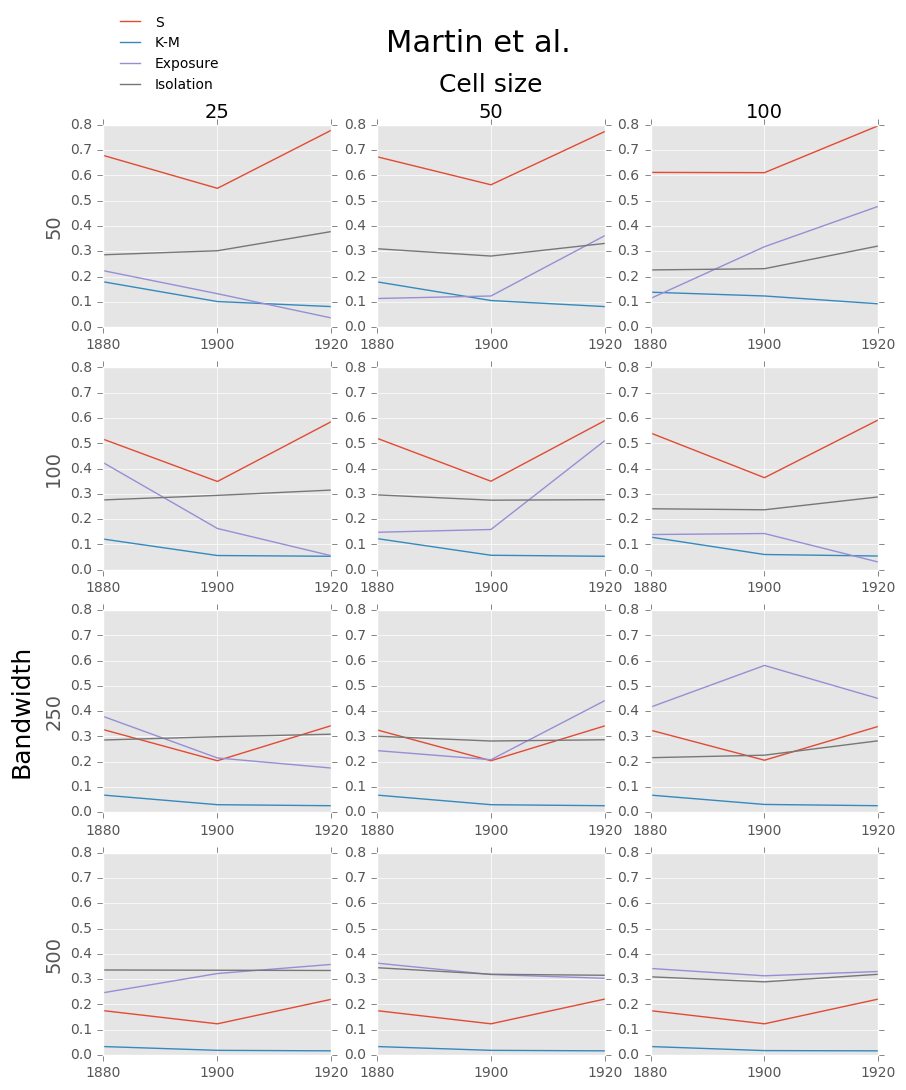

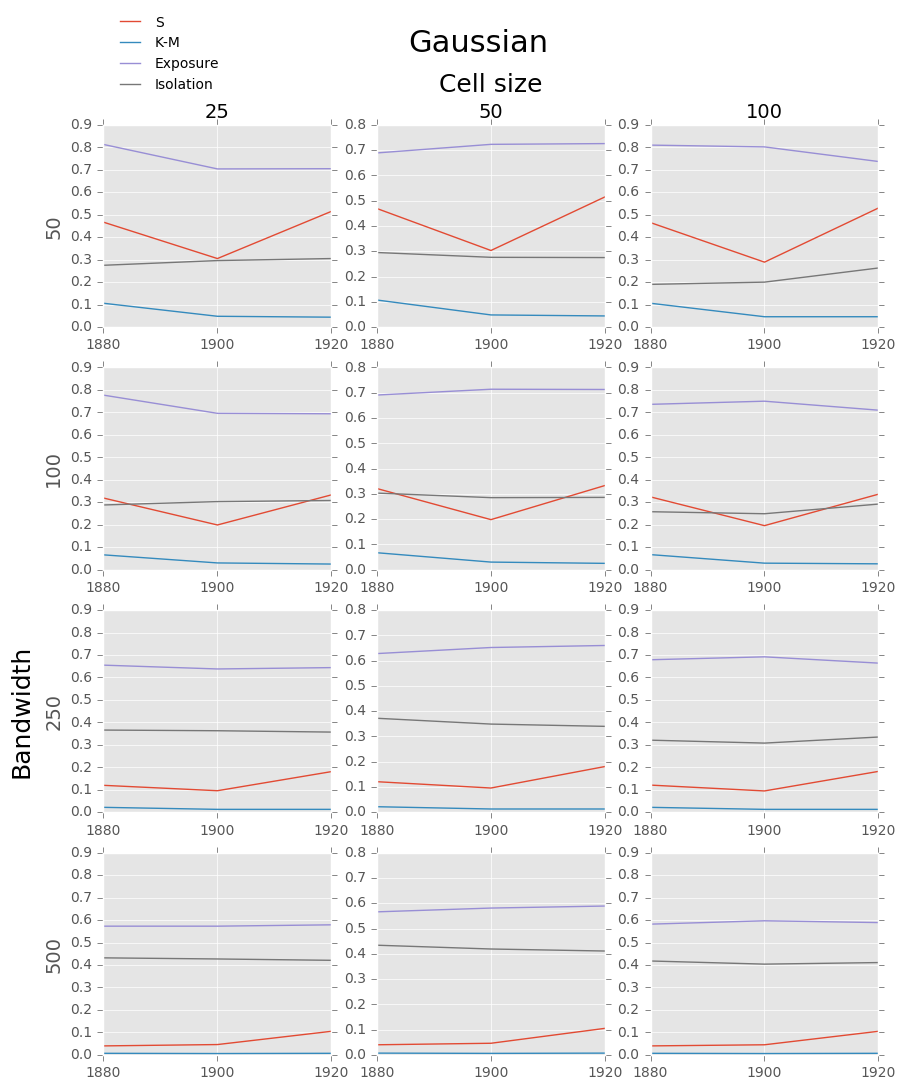

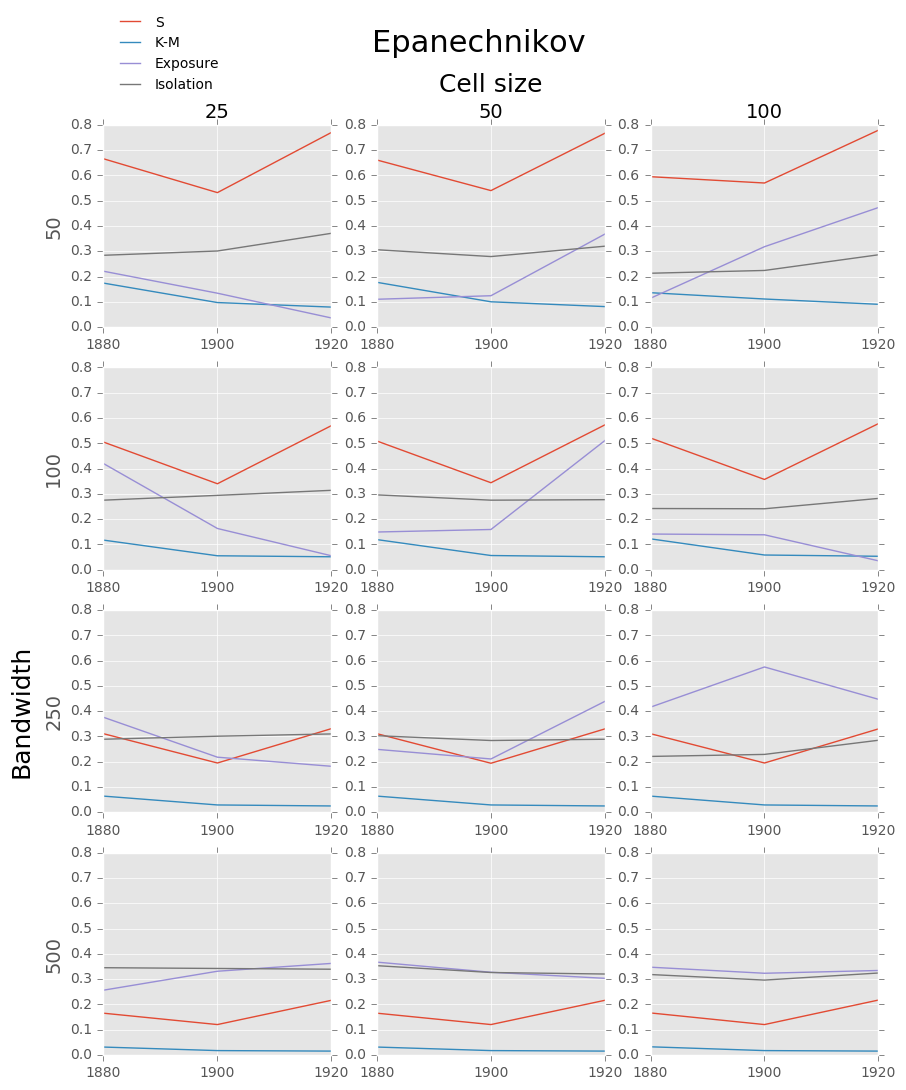

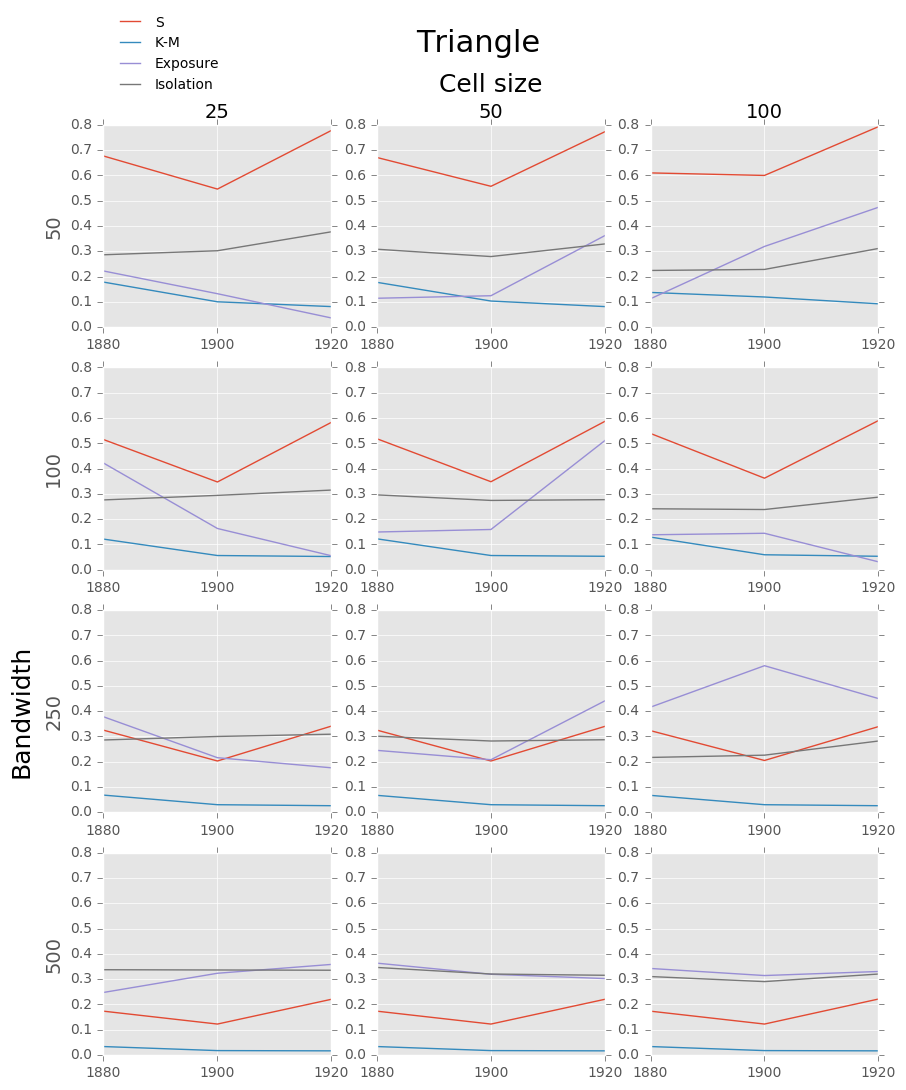

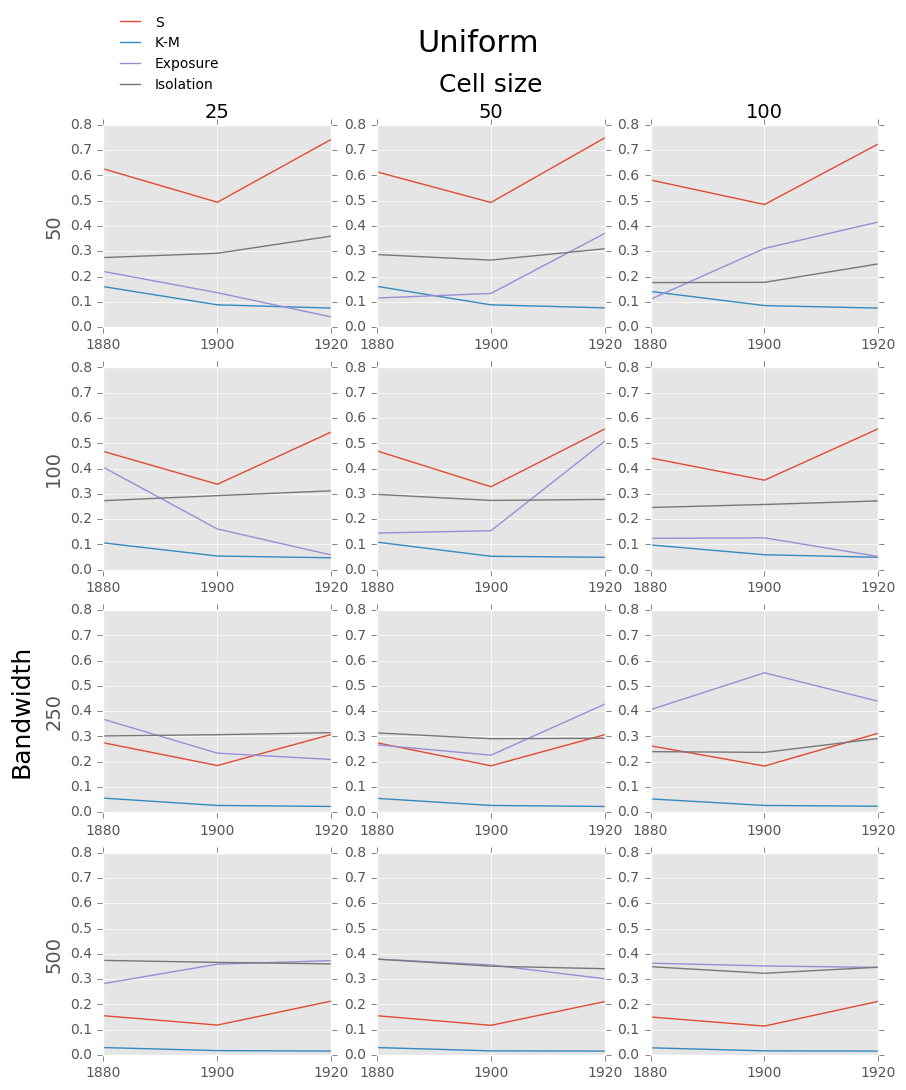

                  s  exposure  isolation        km
s          1.000000 -0.441510  -0.464870  0.812988
exposure  -0.441510  1.000000   0.095818 -0.434990
isolation -0.464870  0.095818   1.000000 -0.567555
km         0.812988 -0.434990  -0.567555  1.000000


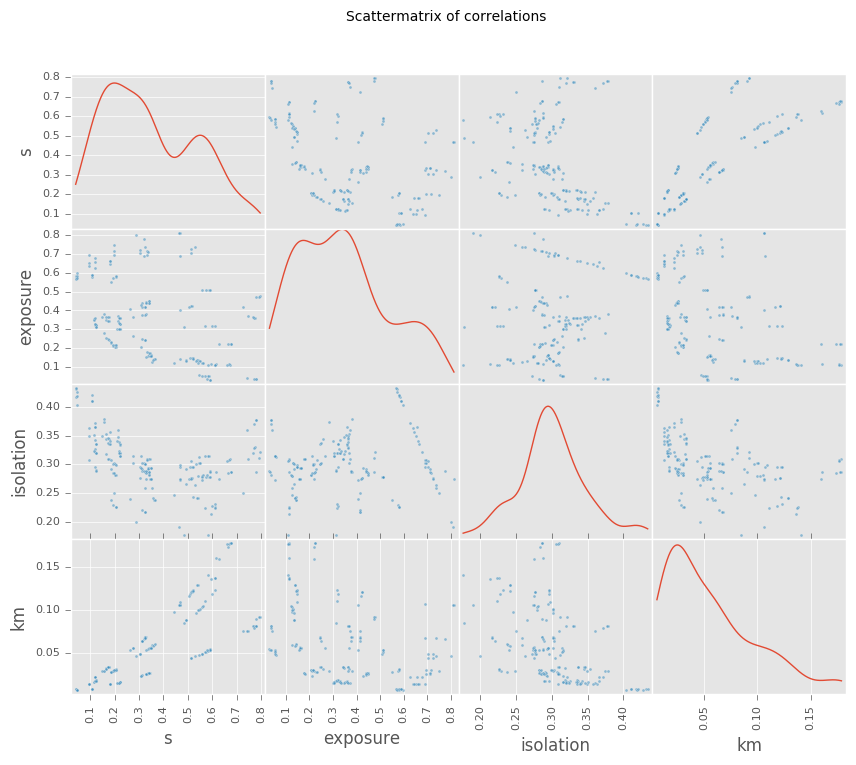

[[ -2.65014496e-01  -2.15107765e-01  -3.18835071e-03   2.27765979e-02]
 [  2.54098111e-01   3.43410822e-02  -2.80264599e-04   3.50206406e-02]
 [ -1.54907011e-01  -3.20673940e-01  -3.42592759e-05   3.99281663e-02]
 [  4.01102392e-01  -5.90511695e-02   2.15885515e-02   7.38327989e-02]
 [  3.57047155e-01  -1.89980861e-02  -4.58254418e-03   5.87675942e-02]
 [  3.98181488e-01  -5.76472998e-02   1.97171371e-02   7.18339790e-02]
 [  3.94148865e-01  -4.80417332e-02   1.64093066e-02   7.25615037e-02]
 [ -3.93553791e-01   7.93192728e-02   9.60688875e-02   3.07996615e-02]
 [ -6.02516616e-02   2.08159714e-01   1.34575196e-02   7.75203685e-03]
 [ -1.02388085e-01   1.99810700e-01   4.85699385e-02   1.65800515e-02]
 [ -6.24114603e-02   2.08912146e-01   1.41589404e-02   8.27846312e-03]
 [ -7.50686941e-02   2.08880783e-01   2.13130177e-02   9.54835477e-03]
 [ -3.89421737e-01  -4.10161083e-02   4.04027315e-02   2.03784686e-02]
 [ -4.02739257e-02   1.04773107e-03  -2.12415196e-02   1.21671409e-02]
 [ -7.

In [6]:
import io
import json

import requests
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from statsmodels.sandbox.tools.tools_pca import pca

from spatial_segregation import data, kde, analyses, plotting

DATA_DIR = 'https://raw.githubusercontent.com/AnttiHaerkoenen/spatial_segregation/master/data'


def get_text(file, data_dir=DATA_DIR):
    url = '{0}/{1}'.format(data_dir, file)
    s = requests.get(url).content
    text_io = io.StringIO(s.decode('utf-8'))
    return text_io

# point_data = json.loads(get_text('points1878.geojson').getvalue())
# 
# v80 = data.aggregate_sum(data.reform(pd.read_csv(get_text('1880.csv'))))
# v00 = data.aggregate_sum(data.reform(pd.read_csv(get_text('1900.csv'))))
# v20 = data.aggregate_sum(data.reform(pd.read_csv(get_text('1920.csv'))))
# 
# pop_data = {
#     '1880': v80,
#     '1900': v00,
#     '1920': v20
# }   
# 
# cells = [i for i in range(20, 81, 20)]
# bandwidths = [i for i in range(50, 501, 150)]
# 
# data = {year: data.add_coordinates(value, point_data, coordinates_to_meters=False)
#         for year, value in pop_data.items()}
# 
# ana1 = analyses.SegregationSurfaceAnalyses(
#     data_dict=data,
#     cell_sizes=cells,
#     kernels=[k for k in kde.KERNELS],
#     bws=bandwidths
# )
# ana1.analyse()
# print(ana1.results)
# ana1.results.plot()
# plt.show()
# 
# ana2 = analyses.SegregationIndexAnalyses(
#     data_dict=data,
#     cell_sizes=cells,
#     kernels=[k for k in kde.KERNELS],
#     bws=bandwidths
# )
# ana2.analyse()
# print(ana2.results)
# ana2.results.plot()
# plt.show()
# 
# results = pd.merge(ana1.results, ana2.results)

##################################################################################################

results = pd.read_csv(get_text('kaikki.csv'))
plt.style.use("ggplot")

ytimet = ["Martin et al.", "Gaussian", "Epanechnikov", "Triangle", "Uniform"]
for i, index in enumerate("distance_decay gaussian epanechnikov triangle uniform".split()):
    plotting.plot_results_all(
        results,
        index,
        indices="s km exposure isolation".split(),
        title=ytimet[i],
        subplot_title_param=dict(bandwidth='bandwidth', cell_size='cell size'),
        labels="S K-M Exposure Isolation".split()
    )
    plt.show()

print(results["s exposure isolation km".split()].corr('spearman'))
scatter_matrix(results["s exposure isolation km".split()], diagonal='kde', figsize=(10, 8))
plt.suptitle('Scattermatrix of correlations')
plt.show()

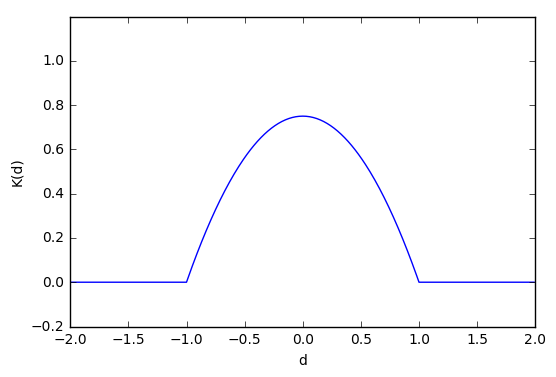

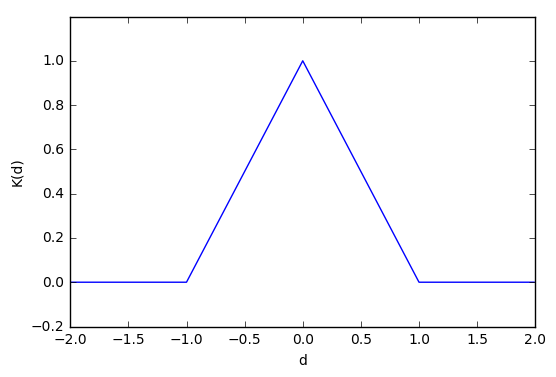

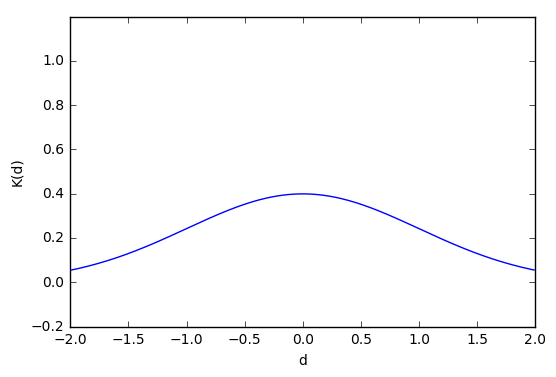

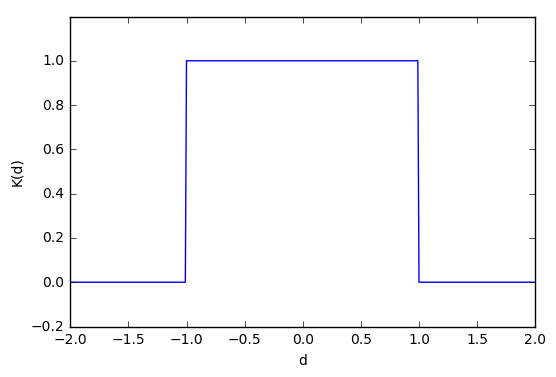

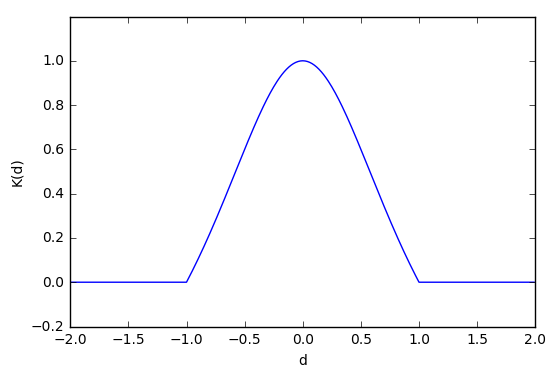

In [1]:
import matplotlib.pyplot as plt

from spatial_segregation import plotting, kde

for k, f in kde.KERNELS.items():
    plotting.plot_kernel(f)
    # plt.title(k.capitalize())
    plt.ylim((-0.2, 1.2))
    plt.ylabel("K(d)")
    plt.xlabel("d")
    plt.show()